In [1]:
# notebook for looking at magnitude patterns on UF
import datasets
from datasets import Dataset, concatenate_datasets
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import os
from scipy.stats import spearmanr
import random
from transformers import AutoTokenizer

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Dataset.load_from_disk("../../data/ultrafeedasp/")

In [3]:
tok = AutoTokenizer.from_pretrained('../../models/sft10k')

In [4]:
def ksco(ex, keyval, keyind="mn"):
    if ex['modj']==keyval: 
        ex['tmpsco'] = ex[keyind+'_j']
    elif ex['modk']==keyval: 
        ex['tmpsco'] = ex[keyind+'_k']
    else: 
        ex['tmpsco'] = -100
    return ex
    
exkey = 'alpaca-7b'
tmp = alldata.map(lambda ex: ksco(ex, exkey, "newsco"), num_proc=10)

NameError: name 'alldata' is not defined

In [33]:
newts = []
for t in tmp['tmpsco']: 
    if t>-100:
        newts.append(t)

(array([  1.,   0.,   1.,   0.,   3.,   6.,   4.,   3.,   5.,   9.,  14.,
         14.,  29.,  17.,  33.,  27.,  43.,  47.,  45.,  63.,  72.,  92.,
        104.,  95., 119., 143., 165., 154., 201., 188., 253., 201., 241.,
        261., 261., 316., 325., 310., 378., 346., 391., 429., 384., 427.,
        468., 426., 409., 486., 519., 540., 538., 577., 550., 528., 558.,
        537., 528., 499., 546., 484., 411., 420., 396., 390., 395., 318.,
        280., 228., 221., 179., 183., 130., 121., 140., 101.,  78.,  70.,
         74.,  41.,  25.,  39.,  36.,  24.,  25.,  16.,  11.,  11.,  11.,
         13.,  10.,  10.,   3.,   3.,   3.,   1.,   1.,   2.,   0.,   3.,
          1.]),
 array([-8.75000e+00, -8.61125e+00, -8.47250e+00, -8.33375e+00,
        -8.19500e+00, -8.05625e+00, -7.91750e+00, -7.77875e+00,
        -7.64000e+00, -7.50125e+00, -7.36250e+00, -7.22375e+00,
        -7.08500e+00, -6.94625e+00, -6.80750e+00, -6.66875e+00,
        -6.53000e+00, -6.39125e+00, -6.25250e+00, -6.11375e+00

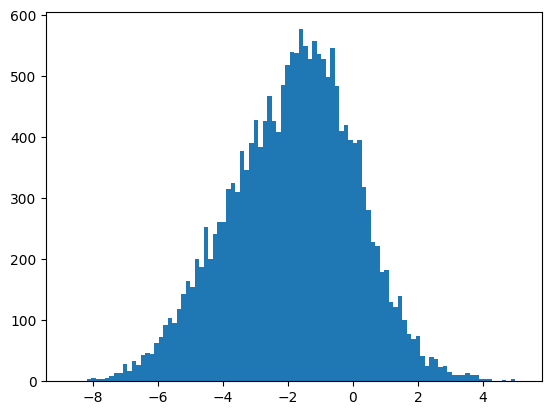

In [34]:
plt.hist(newts, bins=100)

In [18]:
base = "../../outputs/ultragenerscos//"
adfs = {s.replace(".jsonl", ""):pd.read_json(base+s, orient='records', lines=True) for s in os.listdir(base)}

In [19]:
adfs.keys()

dict_keys(['50rmdpoplus100', '50rmdpoplus200', '50rmdpoplus300', '50rmdpoplus450', 'smalldistdpo1000', 'smalldistrrmdpoplus100', 'smalldistdpo2000', 'smalldistrrmdpoplus200', 'smalldistdpo4000', 'smalldistrrmdpoplus300', 'smalldistrrmdpoplus450', 'dpo44sft10k1000', 'dpo44sft10k2000', 'dpo44sft10k4000', 'dpo44sft10k8000', 'sft'])

In [ ]:
mean([s[0] for s in adfs['dpo44sft10k3000']['scores']])

In [56]:
kset = {ex['response_j']+ex['response_k']:(ex['mn_j'], ex['mn_k'], ex['modj'], ex['modk']) for ex in dataset}


KeyboardInterrupt



In [104]:
def update_vals(ex): 
    vals = kset[ex['response_j']+ex['response_k']]
    ex['mn_j'] = vals[0]
    ex['mn_k'] = vals[1]
    ex['modj'] = vals[2]
    ex['modk'] = vals[3]
    return ex

In [105]:
alldata = alldata.map(update_vals, num_proc=10)

In [9]:
# what data sources do we got? 
sources = {'evol_instruct','false_qa','flan_v2_cot','flan_v2_flan2021','flan_v2_niv2','flan_v2_p3', 'sharegpt', 'truthful_qa','ultrachat'}
gens = ['gpt-3.5-turbo', 'llama-2-70b-chat', 'starchat', 'gpt-4', 'wizardlm-7b', 'bard', 'wizardlm-13b', 'mpt-30b-chat', 'wizardlm-70b', 'ultralm-65b', 'falcon-40b-instruct', 'ultralm-13b', 'alpaca-7b', 'llama-2-13b-chat', 'pythia-12b', 'vicuna-33b', 'llama-2-7b-chat']

['gpt-3.5-turbo', 'llama-2-70b-chat', 'starchat', 'gpt-4', 'wizardlm-7b', 'bard', 'wizardlm-13b', 'mpt-30b-chat', 'wizardlm-70b', 'ultralm-65b', 'falcon-40b-instruct', 'ultralm-13b', 'alpaca-7b', 'llama-2-13b-chat', 'pythia-12b', 'vicuna-33b', 'llama-2-7b-chat']


In [14]:
tmp = dataset.filter(lambda ex: ex['modj']=='alpaca-7b')

Loading cached processed dataset at /scratch/cluster/prasanns/research/rlhf-length-biases/data/ultrafeedasp/cache-1d64f35d3209b599.arrow


In [15]:
tmp

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude', 'mn_j', 'mn_k', 'hf_j', 'hf_k', 'hn_j', 'hn_k', 'tn_j', 'tn_k', 'ifg_j', 'ifg_k'],
    num_rows: 13778
})

(array([1545.,  270., 1275., 1208., 3268.,  587., 2284., 1311., 1574.,
         456.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

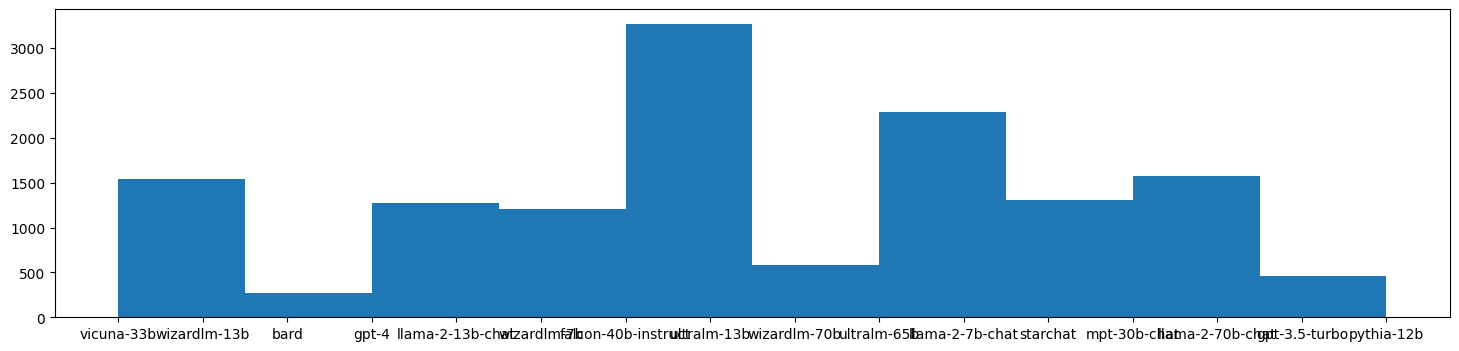

In [16]:
plt.figure(figsize=(18,4))
plt.hist(tmp['modk'])

In [11]:
dataset

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude', '__index_level_0__'],
    num_rows: 340025
})

In [12]:
dset = Dataset.load_from_disk("../../data/ultrafeedall/")

In [13]:
dset

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude'],
    num_rows: 383796
})

In [2]:
dataset = Dataset.from_list([{"hi":"yo"}])

In [11]:
dtmp = Dataset.load_from_disk("../../data/ultrafeeddiff/")

In [12]:
dtmp = dtmp.select(range(100))

In [13]:
dtmp.save_to_disk("../../data/ultratinysanity")

In [5]:
dataset['hi'] = ['yes']

TypeError: 'Dataset' object does not support item assignment

In [39]:
tmp = Dataset.load_from_disk("../../data/ultrafeeddiff//")

In [40]:
tmp = tmp.filter(lambda ex: (ex['tokj']<350) and (ex['tok']<350), num_proc=10)

In [42]:
tmp = tmp.shuffle(seed=0)

In [43]:
tmp.save_to_disk("../../data/ufdiff_short")

In [44]:
to

177590

In [23]:
vals = [tmp['newsco_j'][i] - tmp['newsco_k'][i] for i in range(len(tmp['newsco_j']))]

In [27]:
mean([v>0 for v in vals])

0.66

In [28]:
dsets = []
base = "../../data/7bdata/"
for i in os.listdir(base): 
    dsets.append(Dataset.load_from_disk(base+i))

In [29]:
def add_diff(ex):
    ex['diff'] = ex['newsco_j'] - ex['newsco_k']
    ex['qlen'] = len(tok(ex['question']).input_ids)
    ex['jlen'] = len(tok(ex['response_j']).input_ids)
    ex['klen'] = len(tok(ex['response_k']).input_ids)
    return ex

In [30]:
alldata = concatenate_datasets(dsets)

In [31]:
alldata = alldata.map(add_diff, num_proc=10)

Map (num_proc=10):   0%|                                                                                                               | 0/120000 [00:00<?, ? examples/s]Token indices sequence length is longer than the specified maximum sequence length for this model (734 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (584 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (540 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (830 

In [32]:
alldata = alldata.filter(lambda ex: (ex['qlen']<256) and (ex['jlen']<256) and (ex['klen']<256) )

In [34]:
len(alldata)

68670

In [7]:
len(alldata.filter(lambda ex: ex['diff']>0, num_proc=10))/len(alldata)

0.7425583333333333

(array([5.3400e+02, 7.4340e+03, 1.8590e+04, 2.6016e+04, 3.3091e+04,
        2.3924e+04, 8.3950e+03, 1.8450e+03, 1.6500e+02, 6.0000e+00]),
 array([-9.5625   , -7.7671875, -5.971875 , -4.1765625, -2.38125  ,
        -0.5859375,  1.209375 ,  3.0046875,  4.8      ,  6.5953125,
         8.390625 ]),
 <BarContainer object of 10 artists>)

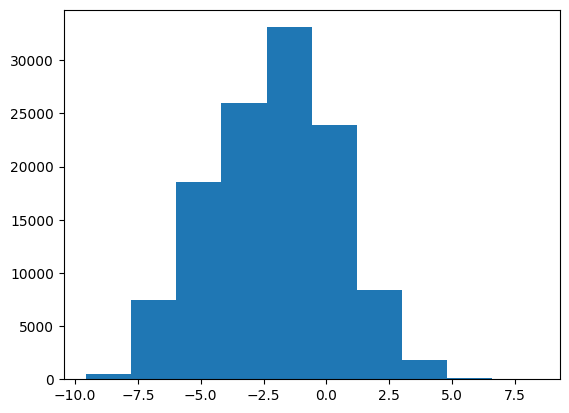

In [25]:
plt.hist(alldata['newsco_k'])

In [40]:
len(alldata)

120000

In [20]:
def getfrac(dset, exs=1000): 
    inds = list(range(len(dset)))
    sampinds = random.sample(inds, exs)
    return dset.select(sampinds)

In [21]:
newtmp = getfrac(alldata, 44000)

In [25]:
newtmp.save_to_disk("../../data/ultra44k")

In [16]:
tmp = alldata.filter(lambda ex: (ex['newsco_j']<0) and (ex['newsco_k']<0))

In [17]:
tmp

Dataset({
    features: ['question', 'source', 'modj', 'modk', 'tokj', 'tok', 'response_j', 'response_k', 'magnitude', '__index_level_0__', 'newsco_j', 'newsco_k', 'diff', 'qlen', 'jlen', 'klen'],
    num_rows: 44403
})

In [18]:
tmp.save_to_disk("../../data/ultrarmsmall")

In [8]:
spearmanr(alldata['diff'], alldata['magnitude'])

SignificanceResult(statistic=0.37847343388994276, pvalue=0.0)

(array([3.0000e+01, 8.1600e+02, 4.6990e+03, 1.3916e+04, 3.2959e+04,
        3.8772e+04, 2.0660e+04, 7.0600e+03, 1.0660e+03, 2.2000e+01]),
 array([-9.96875   , -8.13515625, -6.3015625 , -4.46796875, -2.634375  ,
        -0.80078125,  1.0328125 ,  2.86640625,  4.7       ,  6.53359375,
         8.3671875 ]),
 <BarContainer object of 10 artists>)

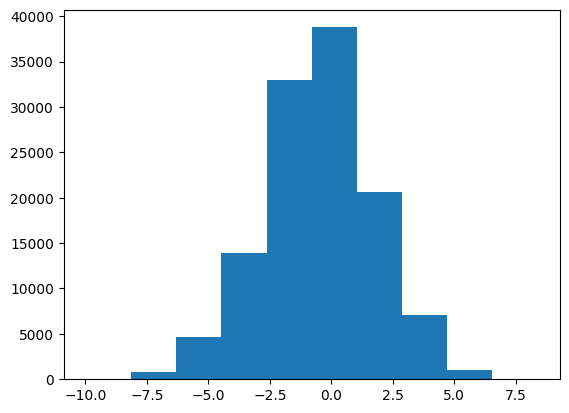

In [9]:
plt.hist(alldata['newsco_j'])